# Pymaceuticals Inc.
---

### Analysis

- After completing my analysis, it appears that the Capomulin drug regime generated more positive results compared to other drugs.  Mice taking Capomulin have a much lower average tumor size, and the data variance was significantly smaller compared to the other regiments. Ramicane acheived similar results to the performance of Capomulin.  Additionally, a random selection of a mouse and analyzing the tumor size over the length of time, the mouse saw a significant drop in the tumor volume between days 10 and 30, with slight increases from days 0-10 and 30-45.  Lastly, their was an observed strong correlation between the average tumor volume and the weight of the mouse, which should be significantly factored in when observing the tumor sizes and the overall success of the drug.
 

In [194]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [173]:
# Checking the number of mice.
number_of_mice = len(mouse_study_complete['Mouse ID'].unique())
number_of_mice

249

In [174]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_timepoints = mouse_study_complete[['Mouse ID', 'Timepoint']].duplicated()
duplicated_timepoints_df = mouse_study_complete.loc[duplicated_timepoints]
duplicated_timepoints_df['Mouse ID'].unique()


array(['g989'], dtype=object)

In [175]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_df = mouse_study_complete.loc[mouse_study_complete['Mouse ID'] == "g989"]
duplicated_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [176]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id_index = mouse_study_complete[mouse_study_complete['Mouse ID'] == "g989"].index

mouse_study_complete.drop(mouse_id_index, inplace=True)

mouse_study_clean = mouse_study_complete

mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [177]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_update = len(mouse_study_clean['Mouse ID'].unique())
number_of_mice_update

248

## Summary Statistics

In [178]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_variance = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

mouse_study_summary = pd.DataFrame({'Mean Tumor Volume': tumor_mean,
                                    'Median Tumor Volume': tumor_median,
                                    'Tumor Volume Variance': tumor_variance,
                                    'Tumor Volume Std. Dev.': tumor_std,
                                    'Tumor Volume Std. Err.': tumor_sem})

mouse_study_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [179]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_agg_method = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
mouse_study_agg_method

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

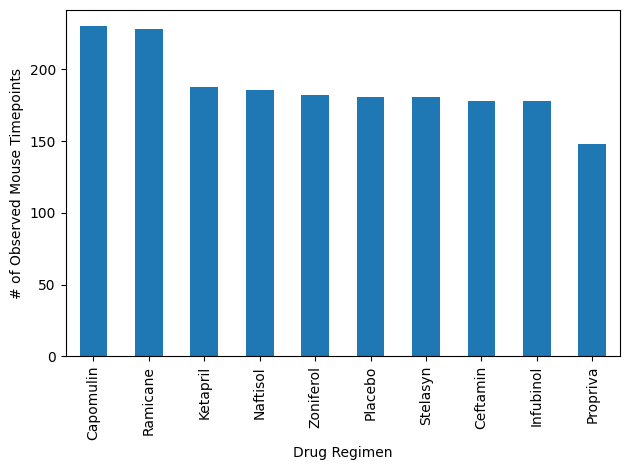

In [180]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = mouse_study_clean.groupby('Drug Regimen')['Timepoint'].size().sort_values(ascending=False)

drug_regimen_bar = drug_regimen_count.plot(kind = "bar", xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

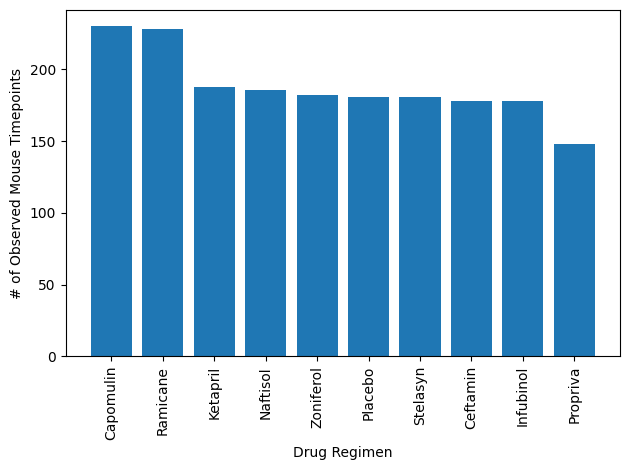

In [181]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_df = drug_regimen_count.to_frame().reset_index()

drug_type = []
timepoints = []

for x in drug_regimen_df['Drug Regimen']:
    drug_type.append(x)
for y in drug_regimen_df['Timepoint']:
    timepoints.append(y)

plt.bar(drug_type, timepoints, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

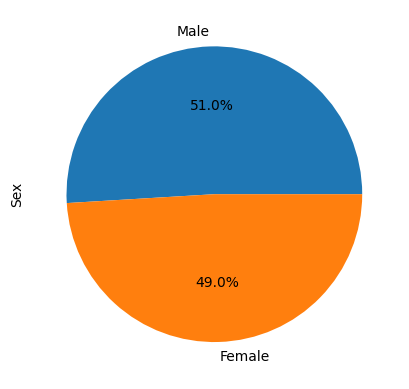

In [182]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = pd.Series(mouse_study_clean['Sex'].value_counts(), name='Sex')

sex_group_pie_plot = sex_group.plot(kind = "pie", autopct = '%1.1f%%')


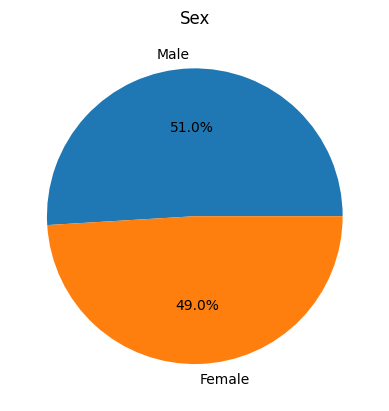

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_group_df = sex_group.to_frame()

sex = list(sex_group_df.index.values)
sex_count = list(sex_group_df.Sex.values)

plt.pie(sex_count, labels=sex, autopct="%1.1f%%")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [184]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.Series(mouse_study_complete.groupby('Mouse ID')['Timepoint'].max(), name = "Max Timepoint")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(mouse_study_clean, max_timepoint, on="Mouse ID")
max_timepoint_df = max_timepoint_df.loc[max_timepoint_df['Timepoint'] == max_timepoint_df['Max Timepoint']].reset_index()
max_timepoint_df

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,9,b128,45,38.982878,2,Capomulin,Female,9,22,45
1,10,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,18,g107,35,71.905117,0,Ketapril,Female,2,29,35
3,21,a457,10,49.783419,0,Ketapril,Female,11,30,10
4,30,c819,40,62.175705,1,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...,...
243,1844,t565,45,34.455298,0,Capomulin,Female,20,17,45
244,1854,i557,45,47.685963,1,Capomulin,Female,1,24,45
245,1864,m957,45,33.329098,1,Capomulin,Female,3,19,45
246,1869,f966,20,30.485985,0,Capomulin,Male,16,17,20


In [185]:
# # Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# # Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data_complete = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_tumor_only_df = max_timepoint_df[['Drug Regimen', 'Tumor Volume (mm3)']]

for drug in treatment_list:
  tumor_volumes = []
  tumor_volume_data_complete.append(tumor_volumes)
  quartiles = drug_tumor_only_df['Tumor Volume (mm3)'].loc[drug_tumor_only_df['Drug Regimen'] == drug].quantile([.25,.5,.75])
  lowerq = quartiles[0.25]
  upperq = quartiles[0.75]
  iqr = upperq-lowerq
  lower_bound = lowerq - (1.5*iqr)
  upper_bound = upperq + (1.5*iqr)

  print(f"{drug}'s IQR is {iqr}") 

  if col["Tumor Volume (mm3)"] < lower_bound or col["Tumor Volume (mm3)"] > upper_bound:
     print(f"  {drug}'s potential outlier is {col['Tumor Volume (mm3)']}")

# Locate the rows which contain mice on each drug and get the tumor volumes
  for index, col in drug_tumor_only_df.iterrows():
    if drug == col['Drug Regimen']:
      tumor_volumes.append(col['Tumor Volume (mm3)'])
  


Capomulin's IQR is 7.781863460000004
Ramicane's IQR is 9.098536719999998
Infubinol's IQR is 11.477135160000003
  Infubinol's potential outlier is 28.43096411
Ceftamin's IQR is 15.577752179999997


C:\Users\crisc\AppData\Local\Temp\ipykernel_54056\3963271471.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(treatment_list)


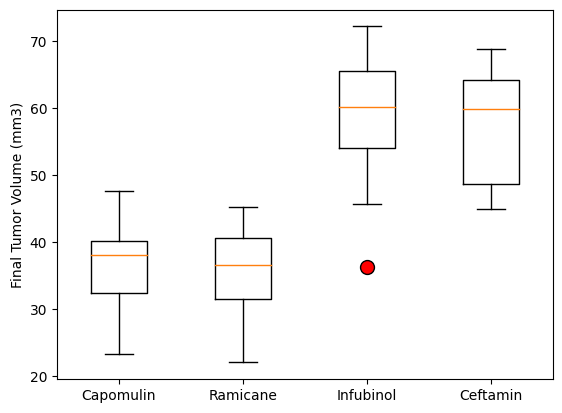

In [186]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(treatment_list)
ax.boxplot(tumor_volume_data_complete, 0, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.show()


## Line and Scatter Plots

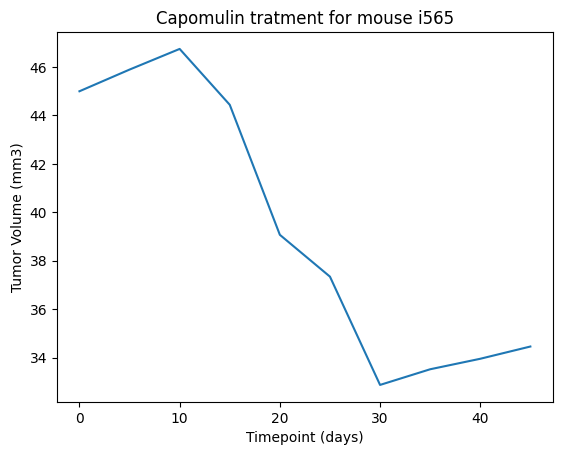

In [187]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_t565 = mouse_study_clean[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']].loc[mouse_study_clean['Mouse ID'] == "t565"]
plt.plot(mouse_t565['Timepoint'], mouse_t565['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin tratment for mouse i565')
plt.show()

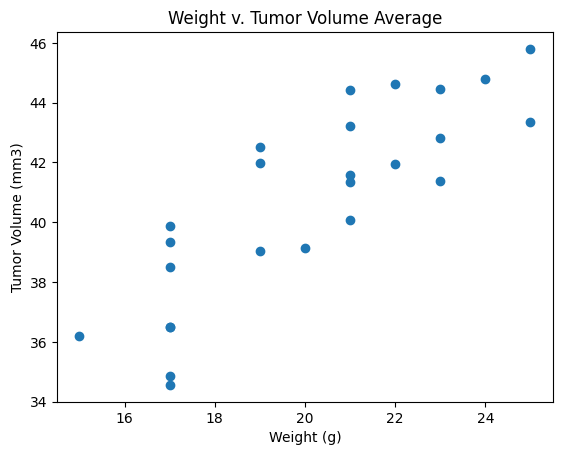

In [190]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_clean[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']].loc[mouse_study_clean['Drug Regimen'] == "Capomulin"].reset_index(drop=True)
capomulin_data_grouped = capomulin_data.groupby('Mouse ID').mean()

x_axis = capomulin_data_grouped['Weight (g)']
y_axis = capomulin_data_grouped['Tumor Volume (mm3)']

plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight v. Tumor Volume Average')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


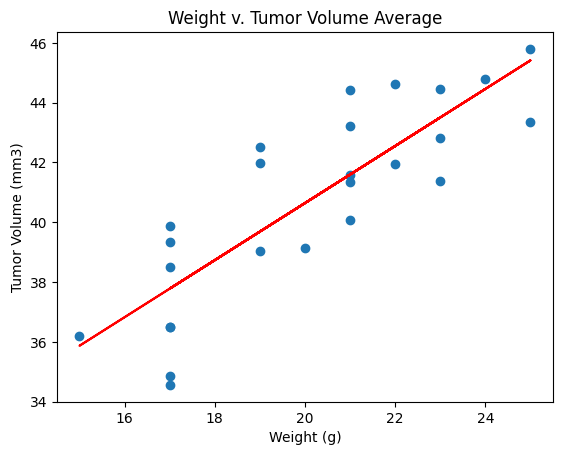

In [195]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight v. Tumor Volume Average')
plt.show()
